In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

In [2]:
def download_csv_data(ticker, start_date, end_date, freq, path):
    
    symbol = yf.Ticker(ticker)

    df = symbol.history(start=start_date, end=end_date, interval=freq)

    df.index = pd.to_datetime(df.index)
    # need to rename columns to without caps
    df = df.rename(columns={'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Volume': 'volume'})

    # save data to csv for later ingestion
    df.to_csv(path, header=True, index=True)

    # plot the time series
    df['close'].plot(title='{} prices --- {}:{}'.format(ticker, start_date, end_date))
    

In [3]:
# Yahoo finance tickers for SP500, RUA, and VIX
# SP500 is called GSPC... can change to SPX
# note that this is NOT the SP composite, it is the SP500 
tickers = ['^GSPC', '^RUA', '^VIX']
start = '1990-01-01'
end = '2022-01-01'
period = '1d'

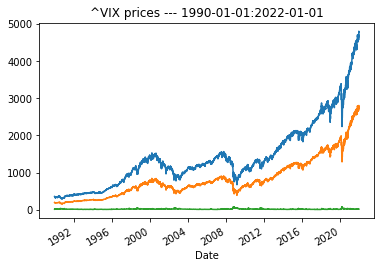

In [4]:
for i in tickers:
    download_csv_data(i, start, end, period, 'data/daily/{}.csv'.format(i))
import os
os.rename ('data/daily/^GSPC.csv', 'data/daily/^SPX.csv')

zipline needs to use bundles, check in terminal with
`zipline bundles`
should output something like:

```
% zipline bundles
csvdir <no ingestions>
quandl <no ingestions>
quantopian-quandl <no ingestions>
```

I am using https://github.com/zkbfdzp/hhatefi for bundle helper.


`git clone https://github.com/zkbfdzp/hhatefi`

`pip install requirements.txt`

`python install.py -f`



adding the three files above as a bundle:
```
CSVDIR='data/' zipline ingest -b csvdir

zipline bundles
```
make sure /data/ folder is organized into /daily and /minute subfolers respectively

In [16]:
RUA_df = pd.read_csv('data/daily/^RUA.csv')
SPX_df = pd.read_csv('data/daily/^SPX.csv')
VIX_df = pd.read_csv('data/daily/^VIX.csv')

# check row at 2018-12-24
RUA_df['Date'].tail(50)

7985    2021-10-21
7986    2021-10-22
7987    2021-10-25
7988    2021-10-26
7989    2021-10-27
7990    2021-10-28
7991    2021-10-29
7992    2021-11-01
7993    2021-11-02
7994    2021-11-03
7995    2021-11-04
7996    2021-11-05
7997    2021-11-08
7998    2021-11-09
7999    2021-11-10
8000    2021-11-11
8001    2021-11-12
8002    2021-11-15
8003    2021-11-16
8004    2021-11-17
8005    2021-11-18
8006    2021-11-19
8007    2021-11-22
8008    2021-11-23
8009    2021-11-24
8010    2021-11-26
8011    2021-11-29
8012    2021-11-30
8013    2021-12-01
8014    2021-12-02
8015    2021-12-03
8016    2021-12-06
8017    2021-12-07
8018    2021-12-08
8019    2021-12-09
8020    2021-12-10
8021    2021-12-13
8022    2021-12-14
8023    2021-12-15
8024    2021-12-16
8025    2021-12-17
8026    2021-12-20
8027    2021-12-21
8028    2021-12-22
8029    2021-12-23
8030    2021-12-27
8031    2021-12-28
8032    2021-12-29
8033    2021-12-30
8034    2021-12-31
Name: Date, dtype: object

Alternatively, we can use the built in function to grab symbols such as:
```
YAHOO_SYM_LST=^RUA,^GSPC,^VIX zipline ingest -b yahoo_direct
```


**I have spent probably 20 hours trying various ways to get the zipline bundle ingest functino to agree,**
**and I can not seem to make any headway.**


**I am going to move to backtrader, continue to read ML4T, and do the Georgia Tech Machine Learning For Trading course**
